In [ ]:
! pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

amzn = pd.read_csv('AMZN.csv')
amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
1,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
3,2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
4,2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...,...
2513,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2514,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2515,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2516,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [ ]:
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
1,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
3,2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
4,2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...,...
2513,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2514,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2515,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2516,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, amzn, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,12.804000,12.905000,12.663000,12.8655,12.8655,65420000.0
2,2013-01-03,12.863500,13.044000,12.818500,12.9240,12.9240,55018000.0
3,2013-01-04,12.879000,12.990000,12.832500,12.9575,12.9575,37484000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,82.800003,83.480003,81.690002,81.8200,81.8200,58228600.0
3649,2022-12-29,82.870003,84.550003,82.550003,84.1800,84.1800,54995900.0
3650,2022-12-30,83.120003,84.050003,82.470001,84.0000,84.0000,62401200.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,6.542000e+07
2,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,5.501800e+07
3,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,3.748400e+07
4,2013-01-05,12.968833,13.155500,12.932833,13.112667,13.112667,5.772267e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,5.822860e+07
3649,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,5.499590e+07
3650,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07
3651,2022-12-31,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07


In [ ]:
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,12.804000,12.905000,12.663000,12.865500,12.865500,6.542000e+07
1,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,6.542000e+07
2,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,5.501800e+07
3,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,3.748400e+07
4,2013-01-05,12.968833,13.155500,12.932833,13.112667,13.112667,5.772267e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,5.822860e+07
3649,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,5.499590e+07
3650,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07
3651,2022-12-31,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07


In [ ]:
amzn_closing_price = df[['Date','Close']]
amzn_closing_price

,Date,Close
0,2013-01-01,12.865500
1,2013-01-02,12.865500
2,2013-01-03,12.924000
3,2013-01-04,12.957500
4,2013-01-05,13.112667
...,...,...
3648,2022-12-28,81.820000
3649,2022-12-29,84.180000
3650,2022-12-30,84.000000
3651,2022-12-31,84.000000


In [ ]:
amzn_data = amzn_closing_price.rename(columns={'Date': 'ds', 'Close': 'y'})
amzn_data

,ds,y
0,2013-01-01,12.865500
1,2013-01-02,12.865500
2,2013-01-03,12.924000
3,2013-01-04,12.957500
4,2013-01-05,13.112667
...,...,...
3648,2022-12-28,81.820000
3649,2022-12-29,84.180000
3650,2022-12-30,84.000000
3651,2022-12-31,84.000000


In [ ]:
split_index = int(amzn_data.shape[0] * 0.8)
train_data = amzn_data.iloc[:split_index]
test_data = amzn_data.iloc[split_index:]

In [ ]:
train_data

,ds,y
0,2013-01-01,12.865500
1,2013-01-02,12.865500
2,2013-01-03,12.924000
3,2013-01-04,12.957500
4,2013-01-05,13.112667
...,...,...
2917,2020-12-27,162.807125
2918,2020-12-28,164.197998
2919,2020-12-29,166.100006
2920,2020-12-30,164.292496


In [ ]:
test_data

,ds,y
2922,2021-01-01,161.967747
2923,2021-01-02,161.088997
2924,2021-01-03,160.210247
2925,2021-01-04,159.331497
2926,2021-01-05,160.925507
...,...,...
3648,2022-12-28,81.820000
3649,2022-12-29,84.180000
3650,2022-12-30,84.000000
3651,2022-12-31,84.000000


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp98vtmu0g/qiwmjpwy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98vtmu0g/23d7criw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85375', 'data', 'file=/tmp/tmp98vtmu0g/qiwmjpwy.json', 'init=/tmp/tmp98vtmu0g/23d7criw.json', 'output', 'file=/tmp/tmp98vtmu0g/prophet_modelx1gillem/prophet_model-20240118155431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:54:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:54:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = model.make_future_dataframe(periods=len(test_data),freq='D')
future_data

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
3648,2022-12-28
3649,2022-12-29
3650,2022-12-30
3651,2022-12-31


In [ ]:
forecast = model.predict(future_data)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,13.348881,3.600910,19.800577,13.348881,13.348881,-1.628643,-1.628643,-1.628643,2.237188,...,0.043858,0.043858,0.043858,-3.909689,-3.909689,-3.909689,0.0,0.0,0.0,11.720237
1,2013-01-02,13.333426,3.868836,19.781484,13.333426,13.333426,-1.486973,-1.486973,-1.486973,2.237188,...,0.135368,0.135368,0.135368,-3.859529,-3.859529,-3.859529,0.0,0.0,0.0,11.846454
2,2013-01-03,13.317972,3.889774,19.950833,13.317972,13.317972,-1.458683,-1.458683,-1.458683,2.237188,...,0.110041,0.110041,0.110041,-3.805911,-3.805911,-3.805911,0.0,0.0,0.0,11.859289
3,2013-01-04,13.302518,3.098006,19.770896,13.302518,13.302518,-1.566464,-1.566464,-1.566464,2.237188,...,-0.053787,-0.053787,-0.053787,-3.749864,-3.749864,-3.749864,0.0,0.0,0.0,11.736054
4,2013-01-05,13.287063,3.705192,20.002671,13.287063,13.287063,-1.521305,-1.521305,-1.521305,2.237188,...,-0.066099,-0.066099,-0.066099,-3.692393,-3.692393,-3.692393,0.0,0.0,0.0,11.765758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,263.473584,214.387734,312.417039,217.886981,312.074303,-1.693378,-1.693378,-1.693378,2.237188,...,0.135368,0.135368,0.135368,-4.065934,-4.065934,-4.065934,0.0,0.0,0.0,261.780206
3649,2022-12-29,263.617651,212.618980,311.428223,217.987188,312.302846,-1.696251,-1.696251,-1.696251,2.237188,...,0.110041,0.110041,0.110041,-4.043480,-4.043480,-4.043480,0.0,0.0,0.0,261.921400
3650,2022-12-30,263.761717,217.754838,311.864995,218.087891,312.541529,-1.829889,-1.829889,-1.829889,2.237188,...,-0.053787,-0.053787,-0.053787,-4.013290,-4.013290,-4.013290,0.0,0.0,0.0,261.931828
3651,2022-12-31,263.905783,214.699531,310.627818,218.188594,312.780212,-1.805117,-1.805117,-1.805117,2.237188,...,-0.066099,-0.066099,-0.066099,-3.976206,-3.976206,-3.976206,0.0,0.0,0.0,262.100666


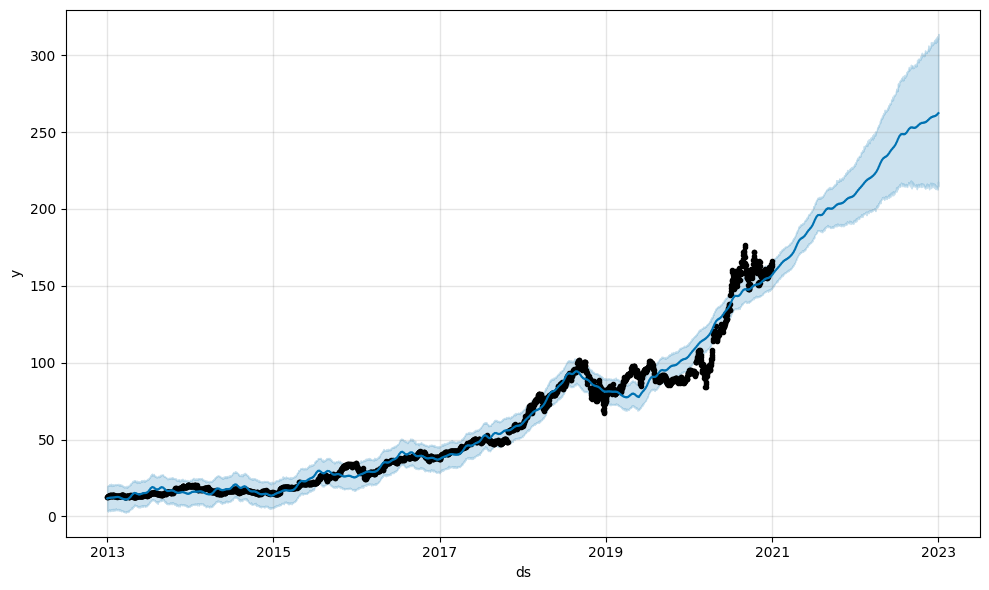

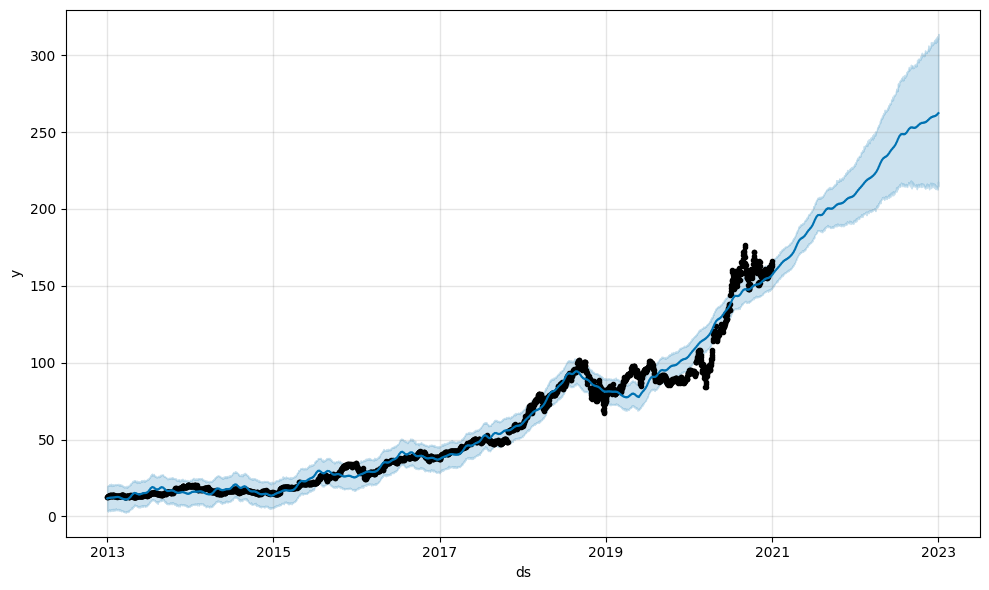

In [ ]:
model.plot(forecast)

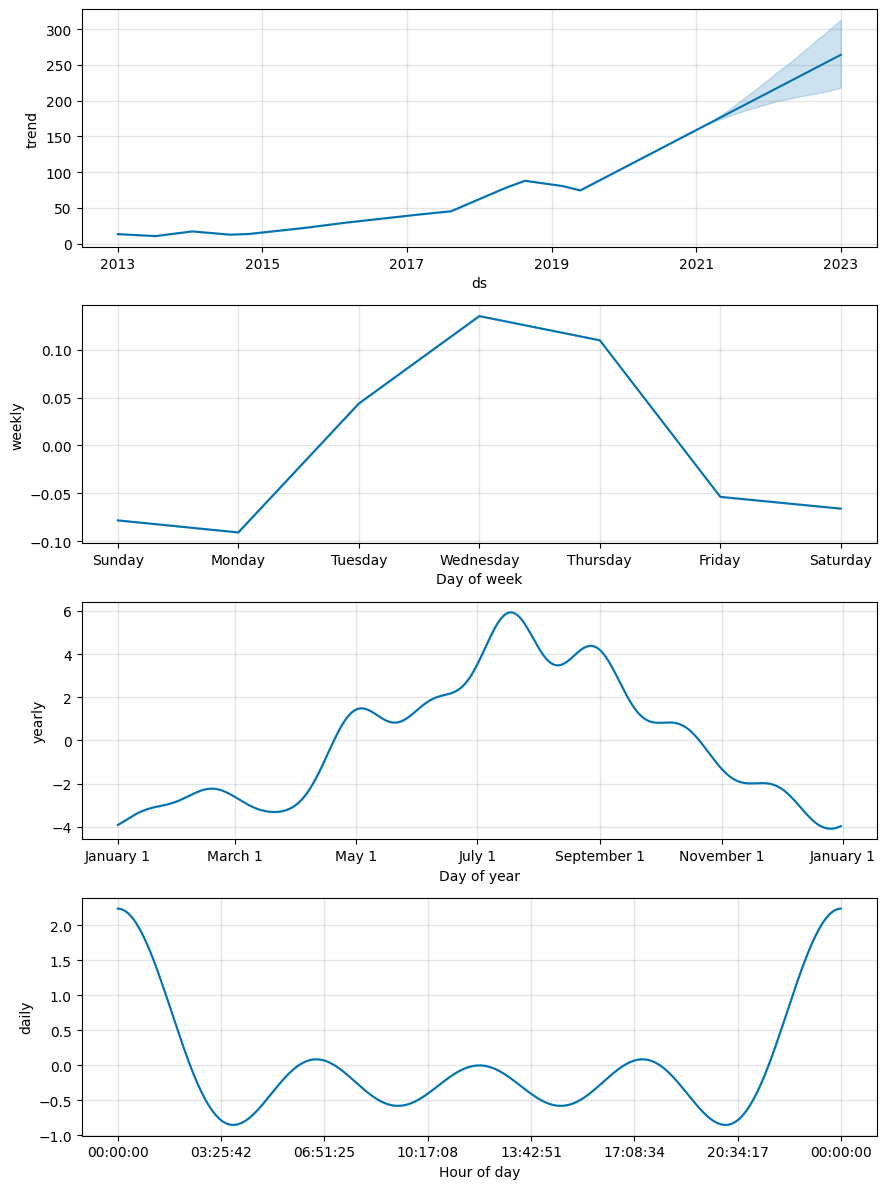

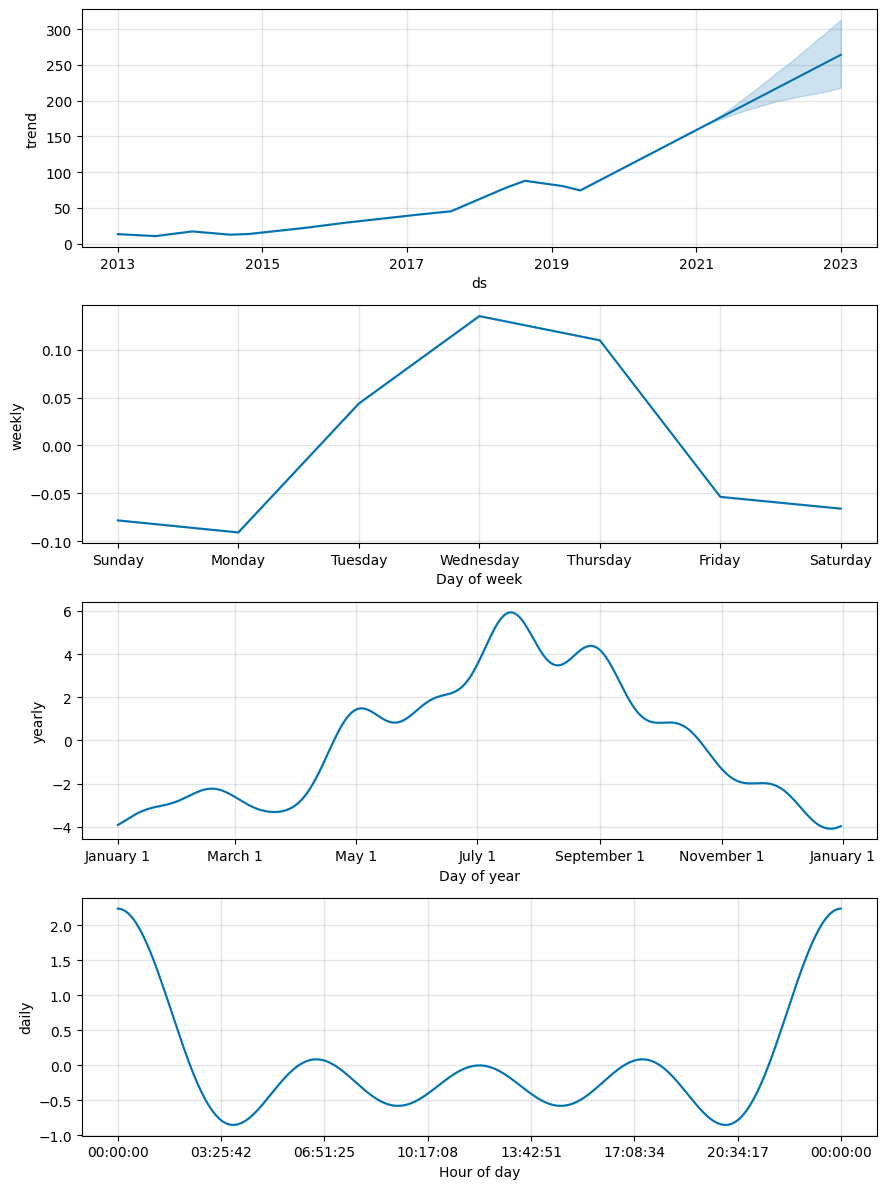

In [ ]:
model.plot_components(forecast)

In [ ]:
df = amzn_data.set_index('ds').join(forecast.set_index('ds'))
df

,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01,12.865500,13.348881,3.600910,19.800577,13.348881,13.348881,-1.628643,-1.628643,-1.628643,2.237188,...,0.043858,0.043858,0.043858,-3.909689,-3.909689,-3.909689,0.0,0.0,0.0,11.720237
2013-01-02,12.865500,13.333426,3.868836,19.781484,13.333426,13.333426,-1.486973,-1.486973,-1.486973,2.237188,...,0.135368,0.135368,0.135368,-3.859529,-3.859529,-3.859529,0.0,0.0,0.0,11.846454
2013-01-03,12.924000,13.317972,3.889774,19.950833,13.317972,13.317972,-1.458683,-1.458683,-1.458683,2.237188,...,0.110041,0.110041,0.110041,-3.805911,-3.805911,-3.805911,0.0,0.0,0.0,11.859289
2013-01-04,12.957500,13.302518,3.098006,19.770896,13.302518,13.302518,-1.566464,-1.566464,-1.566464,2.237188,...,-0.053787,-0.053787,-0.053787,-3.749864,-3.749864,-3.749864,0.0,0.0,0.0,11.736054
2013-01-05,13.112667,13.287063,3.705192,20.002671,13.287063,13.287063,-1.521305,-1.521305,-1.521305,2.237188,...,-0.066099,-0.066099,-0.066099,-3.692393,-3.692393,-3.692393,0.0,0.0,0.0,11.765758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,81.820000,263.473584,214.387734,312.417039,217.886981,312.074303,-1.693378,-1.693378,-1.693378,2.237188,...,0.135368,0.135368,0.135368,-4.065934,-4.065934,-4.065934,0.0,0.0,0.0,261.780206
2022-12-29,84.180000,263.617651,212.618980,311.428223,217.987188,312.302846,-1.696251,-1.696251,-1.696251,2.237188,...,0.110041,0.110041,0.110041,-4.043480,-4.043480,-4.043480,0.0,0.0,0.0,261.921400
2022-12-30,84.000000,263.761717,217.754838,311.864995,218.087891,312.541529,-1.829889,-1.829889,-1.829889,2.237188,...,-0.053787,-0.053787,-0.053787,-4.013290,-4.013290,-4.013290,0.0,0.0,0.0,261.931828


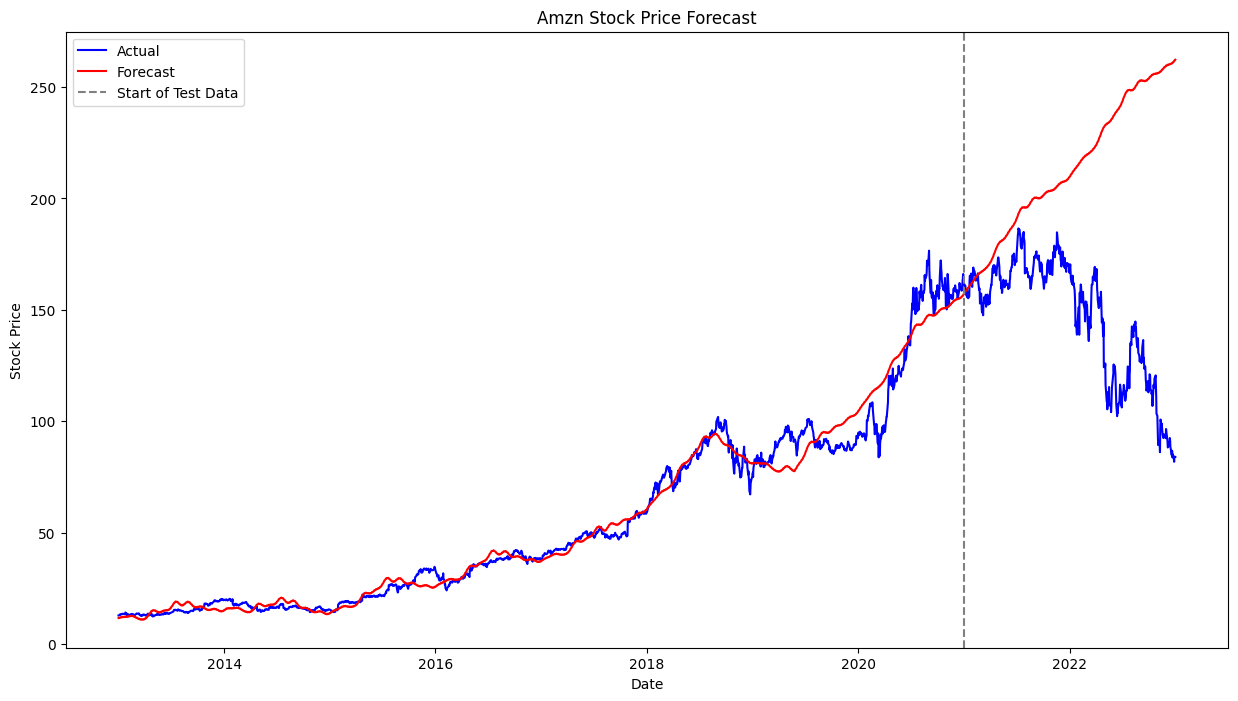

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.plot(df.index, df['y'], label='Actual', color='blue')
plt.plot(df.index, df['yhat'], label='Forecast', color='red')
plt.axvline(x=train_data['ds'].max(), color='gray', linestyle='--', label='Start of Test Data')

plt.title('Amzn Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mae_test = mean_absolute_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])


print('The MAE for train is',mae_train)
print('The MAE for test is',mae_test)

The MAE for train is 4.312202665800003
The MAE for test is 67.37160776981187


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mse_test = mean_squared_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])

print('The MSE for train is',mse_train)
print('The MSE for test is',mse_test)

The MSE for train is 40.41754474968883
The MSE for test is 7522.181352476058


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for test is', rmse_test)

The RMSE for train is 6.357479433681939
The RMSE for test is 86.7305099286062
